In [43]:
import pandas as pd

In [44]:
df=pd.read_csv('/content/META Stock data.csv')

In [45]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [46]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2637,2022-11-09,101.720001,104.900002,100.739998,101.470001,101.470001,107677300
2638,2022-11-10,107.120003,112.750000,104.610001,111.870003,111.870003,80671000
2639,2022-11-11,109.230003,114.900002,108.809998,113.019997,113.019997,59836400
2640,2022-11-14,110.989998,116.269997,110.800003,114.220001,114.220001,53395000
2641,2022-11-15,116.070000,118.739998,114.410004,117.080002,117.080002,50549300


In [47]:
df1=df.reset_index()['Close']

In [48]:
df1

0        38.230000
1        34.029999
2        31.000000
3        32.000000
4        33.029999
           ...    
2637    101.470001
2638    111.870003
2639    113.019997
2640    114.220001
2641    117.080002
Name: Close, Length: 2642, dtype: float64

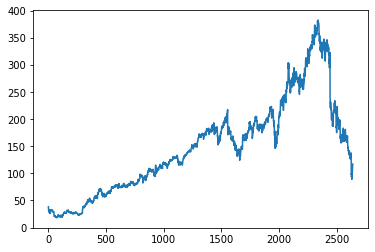

In [49]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [50]:
import numpy as np

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [52]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [53]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [54]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [55]:
print(X_train.shape), print(y_train.shape)

(1616, 100)
(1616,)


(None, None)

In [56]:
print(X_test.shape), print(ytest.shape)

(824, 100)
(824,)


(None, None)

In [57]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [58]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [59]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 [==============================] - 6s 245ms/step - loss: 7.1341e-05 - val_loss: 0.0022
Epoch 2/100
26/26 [==============================] - 11s 404ms/step - loss: 6.2918e-05 - val_loss: 9.9726e-04
Epoch 3/100
26/26 [==============================] - 10s 369ms/step - loss: 5.8636e-05 - val_loss: 0.0016
Epoch 4/100
26/26 [==============================] - 5s 205ms/step - loss: 6.0781e-05 - val_loss: 0.0015
Epoch 5/100
26/26 [==============================] - 6s 235ms/step - loss: 5.6470e-05 - val_loss: 0.0014
Epoch 6/100
26/26 [==============================] - 6s 212ms/step - loss: 7.1271e-05 - val_loss: 0.0012
Epoch 7/100
26/26 [==============================] - 5s 210ms/step - loss: 5.6475e-05 - val_loss: 0.0010
Epoch 8/100
26/26 [==============================] - 5s 206ms/step - loss: 6.4124e-05 - val_loss: 0.0027
Epoch 9/100
26/26 [==============================] - 5s 209ms/step - loss: 8.9675e-05 - val_loss: 8.8503e-04
Epoch 10/100
26/26 [=========================

In [62]:
import tensorflow as tf

In [63]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

26/26 [==============================] - 1s 48ms/step


In [64]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [65]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

118.46193188752306

In [66]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

245.17041133748268

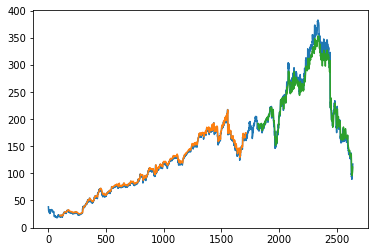

In [67]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [78]:
len(test_data)

925

In [79]:
x_input=test_data[825:].reshape(1,-1)
x_input.shape


(1, 100)

In [80]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [81]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.2709321]
101
1 day input [0.39223486 0.40117987 0.39379888 0.39045137 0.41284128 0.41717659
 0.42381672 0.42022227 0.39827139 0.39934149 0.39994514 0.38501854
 0.40326519 0.41020716 0.43366718 0.45372479 0.4539443  0.41580466
 0.40861571 0.38803676 0.41665525 0.39234464 0.3878996  0.39017697
 0.3908904  0.41451504 0.41937168 0.40987791 0.41849363 0.41377419
 0.44069145 0.43835919 0.4466182  0.4476883  0.44379203 0.4311154
 0.43059407 0.41221021 0.39873784 0.39341474 0.39931403 0.41446015
 0.39525313 0.38809165 0.3825765  0.39840855 0.40507615 0.39124711
 0.386363   0.39143916 0.3960214  0.41547537 0.41495407 0.37151875
 0.36696393 0.36169572 0.35275071 0.35749762 0.35220194 0.34130881
 0.34322955 0.33661684 0.32553162 0.32012621 0.33990946 0.32564139
 0.32363835 0.33167788 0.33626012 0.33269309 0.33294007 0.31751955
 0.31845245 0.30404718 0.30119359 0.30884894 0.29916313 0.31913841
 0.31573605 0.3169159  0.31225134 0.30808066 0.30728496 0.32865962
 0.30755936 0.22008507 0.22354232 0

In [84]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [86]:
len(df1)

2642

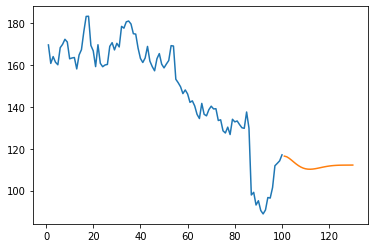

In [87]:
import matplotlib.pyplot as plt
plt.plot(day_new,scaler.inverse_transform(df1[2542:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))